In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
df = pd.read_csv('2000_2021_Brazilian_North_Region_hourly_MWmed_hydroelectric_power_series.csv', parse_dates=['Data Escala de Tempo 1 GE Simp 4'], index_col='Data Escala de Tempo 1 GE Simp 4')


In [3]:
df.rename(columns = {'Selecione Tipo de GE Simp 4':'energia'}, inplace = True)
df.index.names = ['data']
df.loc[:,['ano']] = [d.year for d in df.index]
dados = df.loc[:,("energia","ano")]

In [336]:
cols = ['energia']
dados[cols] = dados[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [338]:
primeiro_ano = dados.loc["2000"]
dados.head()


,energia,ano
data,,
2000-01-01 00:00:00,24225,2000
2000-01-01 01:00:00,27693,2000
2000-01-01 02:00:00,31247,2000
2000-01-01 03:00:00,31546,2000
2000-01-01 04:00:00,31218,2000


In [307]:
#plt.figure(figsize=(15,4))
#plt.plot(primeiro_ano.index, primeiro_ano.energia)
#plt.show()


In [311]:
dados['d-semana'] = [d.strftime('%w') for d in dados.index]

In [321]:
primeiro_ano = dados.loc["2000"]
dados.tail()

,energia,ano,d-semana
data,,,
2021-01-30 20:00:00,NaN,2021,6
2021-01-30 21:00:00,NaN,2021,6
2021-01-30 22:00:00,NaN,2021,6
2021-01-30 23:00:00,NaN,2021,6
2021-01-31 00:00:00,6279152.0,2021,0


<AxesSubplot:xlabel='d-semana', ylabel='energia'>

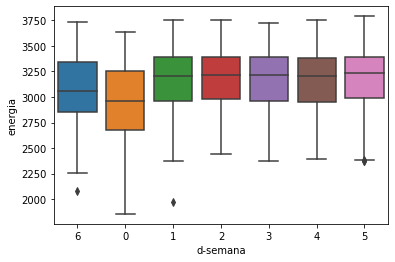

In [38]:
sns.boxplot(x='d-semana', y='energia', data=primeiro_ano)

In [39]:
cinco_anos = dados.loc[:"2005"]

<AxesSubplot:xlabel='d-semana', ylabel='energia'>

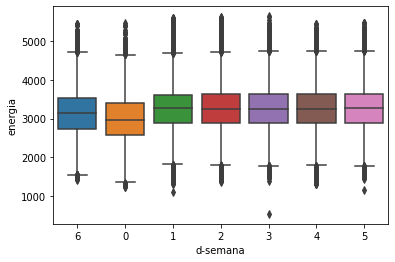

In [40]:
sns.boxplot(x='d-semana', y='energia', data=cinco_anos)

In [41]:
dados['mes'] = [d.strftime('%m') for d in dados.index]

<AxesSubplot:xlabel='mes', ylabel='energia'>

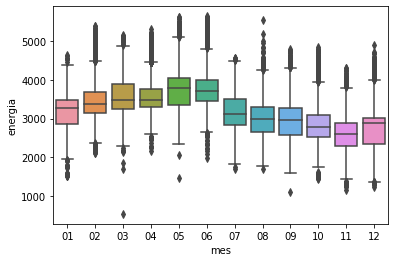

In [42]:
cinco_anos = dados.loc[:"2005"]
sns.boxplot(x='mes', y='energia', data=cinco_anos)

<AxesSubplot:xlabel='ano', ylabel='energia'>

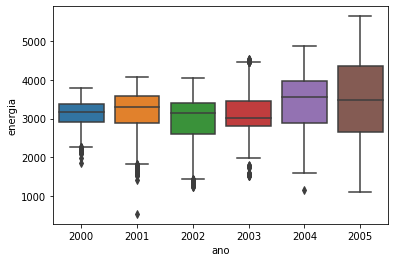

In [43]:
cinco_anos = dados.loc[:"2005"]
sns.boxplot(x='ano', y='energia', data=cinco_anos)

<AxesSubplot:xlabel='ano', ylabel='energia'>

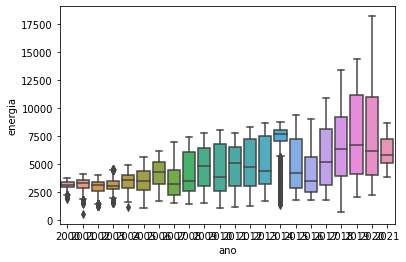

In [44]:
sns.boxplot(x='ano', y='energia', data=dados)

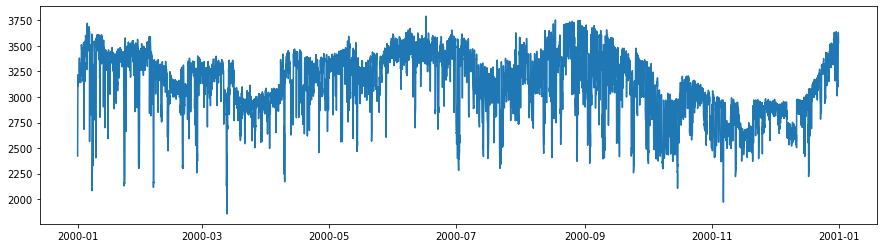

In [45]:
plt.figure(figsize=(15,4))
plt.plot(primeiro_ano.energia)
plt.show()

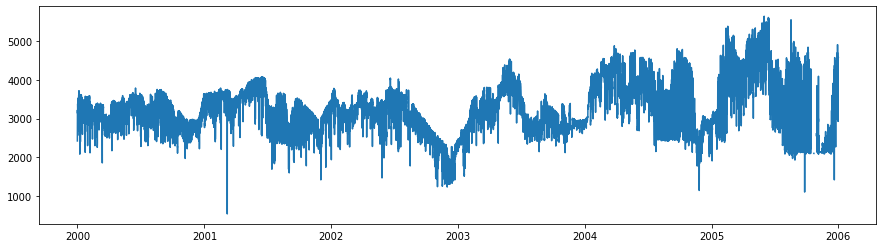

In [46]:
plt.figure(figsize=(15,4))
plt.plot(cinco_anos.energia)
plt.show()

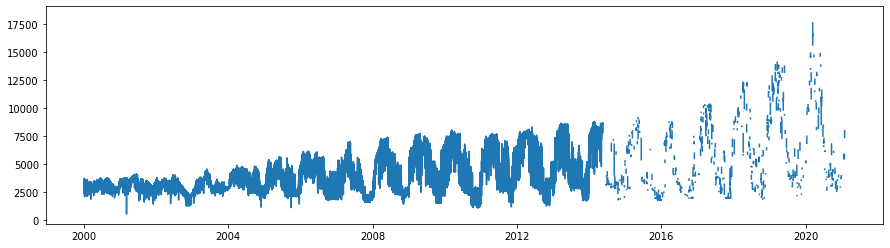

In [47]:
plt.figure(figsize=(15,4))
plt.plot(dados.energia)
plt.show()

In [48]:
dados['dia'] = [d.strftime('%d') for d in dados.index]

In [49]:
dias = dados['dia'].unique()

In [143]:
dsemanas = dados['d-semana'].unique()
semanas = dados['semana'].unique()

In [50]:
meses = dados['mes'].unique()

In [53]:
anos = dados['ano'].unique()

In [122]:
dados['hora'] = [d.strftime('%H') for d in dados.index]

In [132]:
primeiros_dez_dias = dados.loc[:"2000-01-10"]

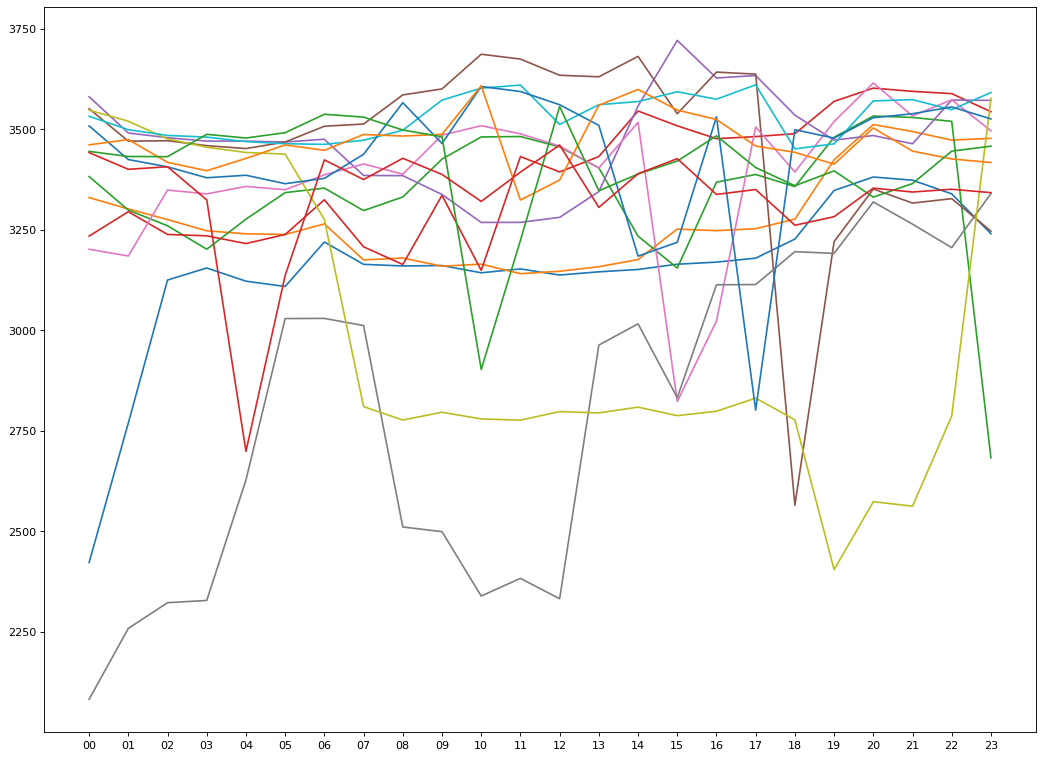

In [133]:
plt.figure(figsize=(16,12), dpi= 80)
for i, d in enumerate(dias):
        plt.plot('hora','energia', data=primeiros_sete_dias.loc[primeiros_sete_dias.dia==d,:], label=d)
plt.show()

In [235]:
dados['semana'] = [d.strftime('%U') for d in dados.index]
dados['d-semana hora'] = dados['d-semana'] + "-" + dados['hora']

In [241]:
#Eu tirei o primeiro dia pq ele era da primeira semana quebrada
primeiras_tres_semanas = dados.iloc[24:24+24*7*3]

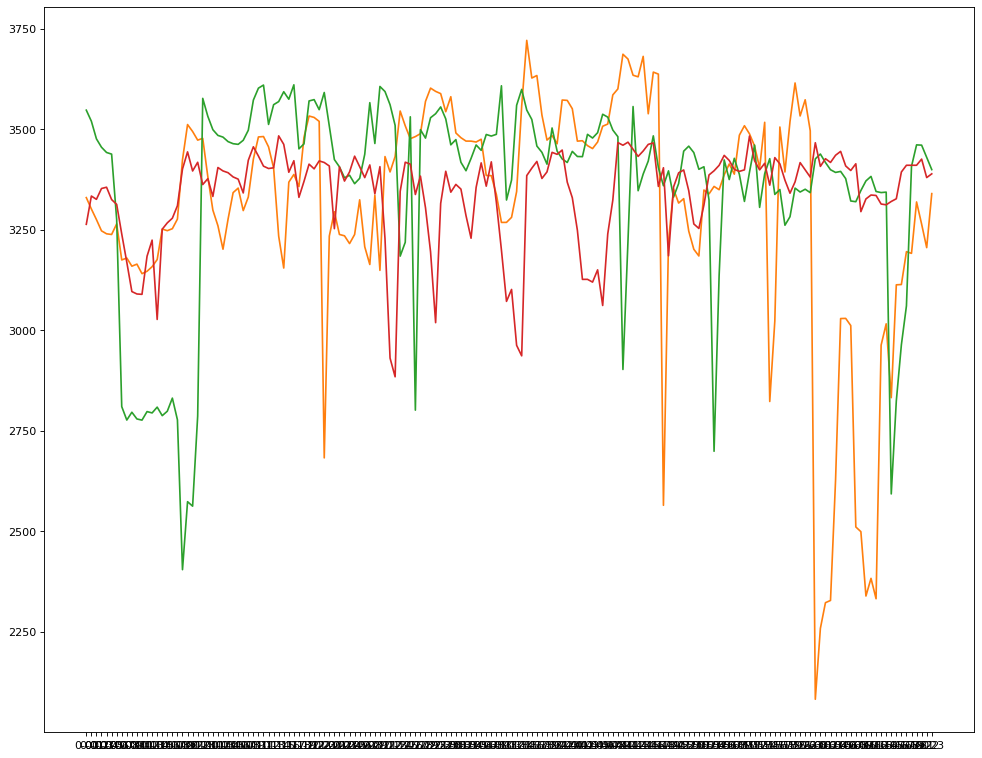

In [244]:
plt.figure(figsize=(15,12), dpi= 80)
for i, s in enumerate(semanas):
        plt.plot('d-semana hora','energia', data=primeiras_tres_semanas.loc[primeiras_tres_semanas.semana==s,:], label=s)
plt.show()

In [345]:
primeiras_tres_semanas

,energia,ano,d-semana,mes,dia,hora,semana,d-semana hora,dia hora,mes dia hora,energia-s
data,,,,,,,,,,,
2000-01-02 00:00:00,3329.6,2000,0,01,02,00,01,0-00,02-00,01-02-00,3202.392165
2000-01-02 01:00:00,3301.4,2000,0,01,02,01,01,0-01,02-01,01-02-01,3207.360609
2000-01-02 02:00:00,3275.0,2000,0,01,02,02,01,0-02,02-02,01-02-02,3212.285012
2000-01-02 03:00:00,3247.0,2000,0,01,02,03,01,0-03,02-03,01-02-03,3217.165373
2000-01-02 04:00:00,3239.6,2000,0,01,02,04,01,0-04,02-04,01-02-04,3222.001693
...,...,...,...,...,...,...,...,...,...,...,...
2000-01-22 19:00:00,3410.0,2000,6,01,22,19,03,6-19,22-19,01-22-19,3101.561882
2000-01-22 20:00:00,3410.0,2000,6,01,22,20,03,6-20,22-20,01-22-20,3093.927633
2000-01-22 21:00:00,3425.3,2000,6,01,22,21,03,6-21,22-21,01-22-21,3086.494410


In [262]:
dados['dia hora'] = dados['dia'] + "-" + dados['hora']
primeiros_tres_meses = dados.loc[:"2000-03"]

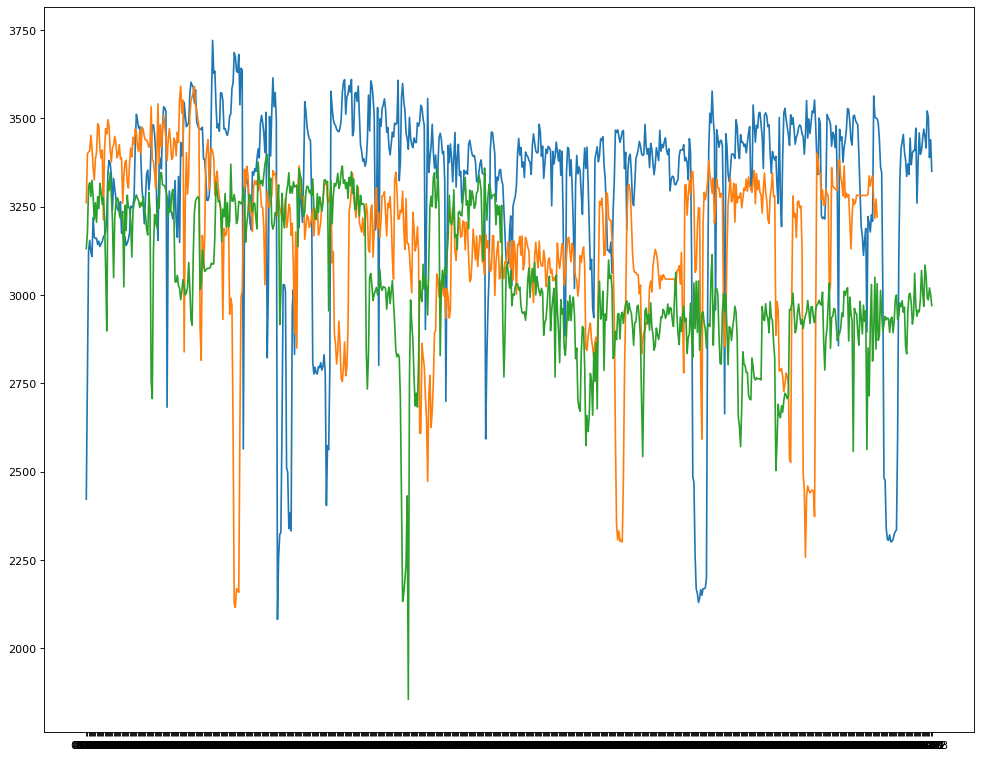

In [263]:
plt.figure(figsize=(15,12), dpi= 80)
for i, m in enumerate(meses):
        plt.plot('dia hora','energia', data=primeiros_tres_meses.loc[primeiros_tres_meses.mes==m,:], label=m)
plt.show()

In [268]:
dados['mes dia hora'] = dados['mes'] + "-" + dados['dia'] + "-" + dados['hora']
primeiros_tres_anos = dados.loc[:"2002"]

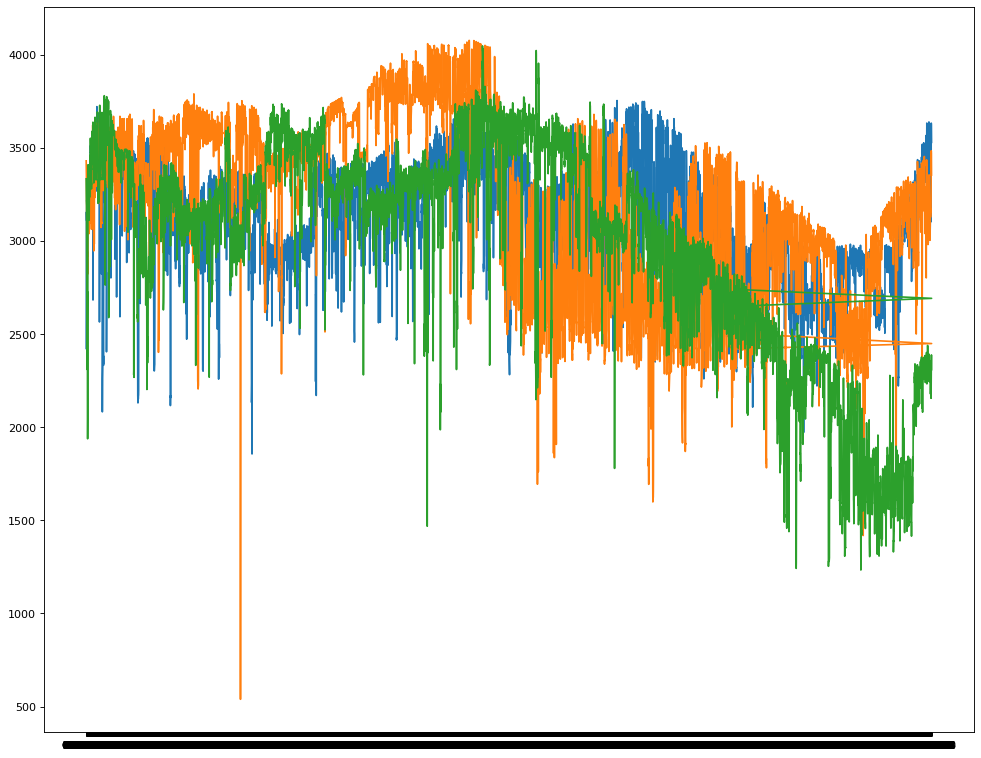

In [346]:
plt.figure(figsize=(15,12), dpi= 80)
for i, a in enumerate(anos):
        plt.plot('mes dia hora','energia', data=primeiros_tres_anos.loc[primeiros_tres_anos.ano==a,:], label=a)
plt.show()

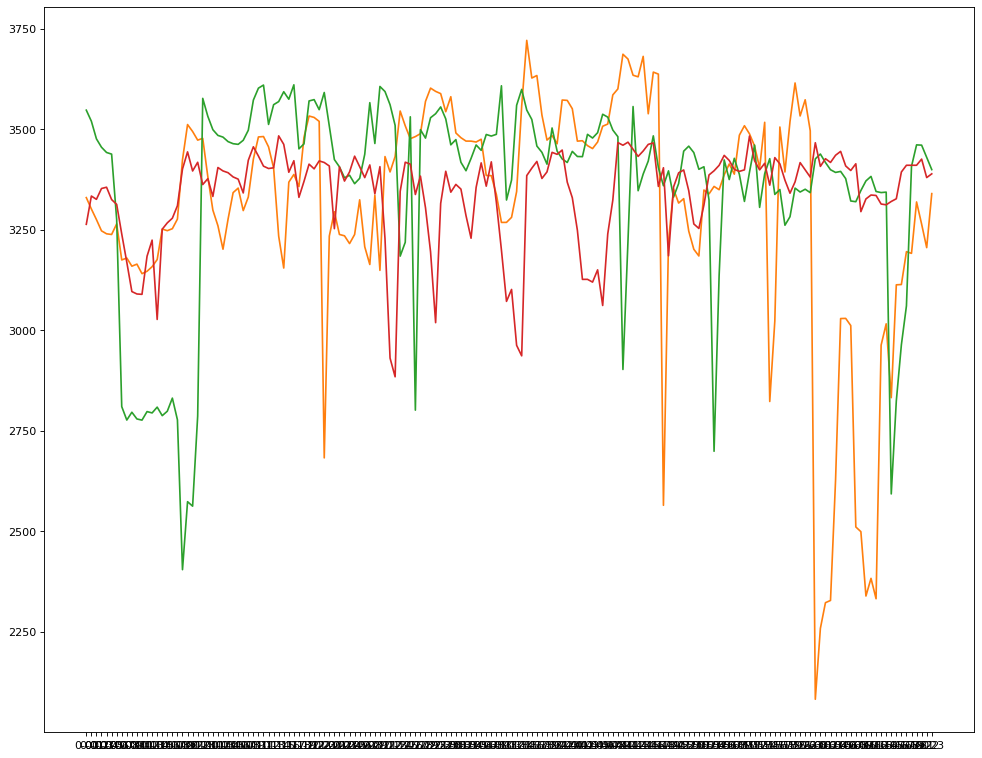

In [270]:
plt.figure(figsize=(15,12), dpi= 80)
for i, s in enumerate(semanas):
        plt.plot('d-semana hora','energia', data=primeiras_tres_semanas.loc[primeiras_tres_semanas.semana==s,:], label=s)
plt.show()

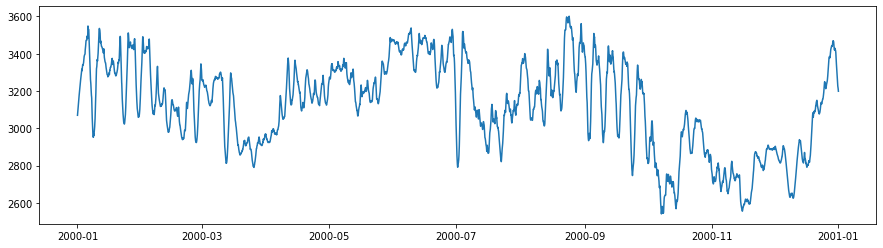

In [287]:
primeiro_ano = dados.loc["2000"]
plt.figure(figsize=(15,4))
plt.plot(primeiro_ano["energia-s"])
plt.show()

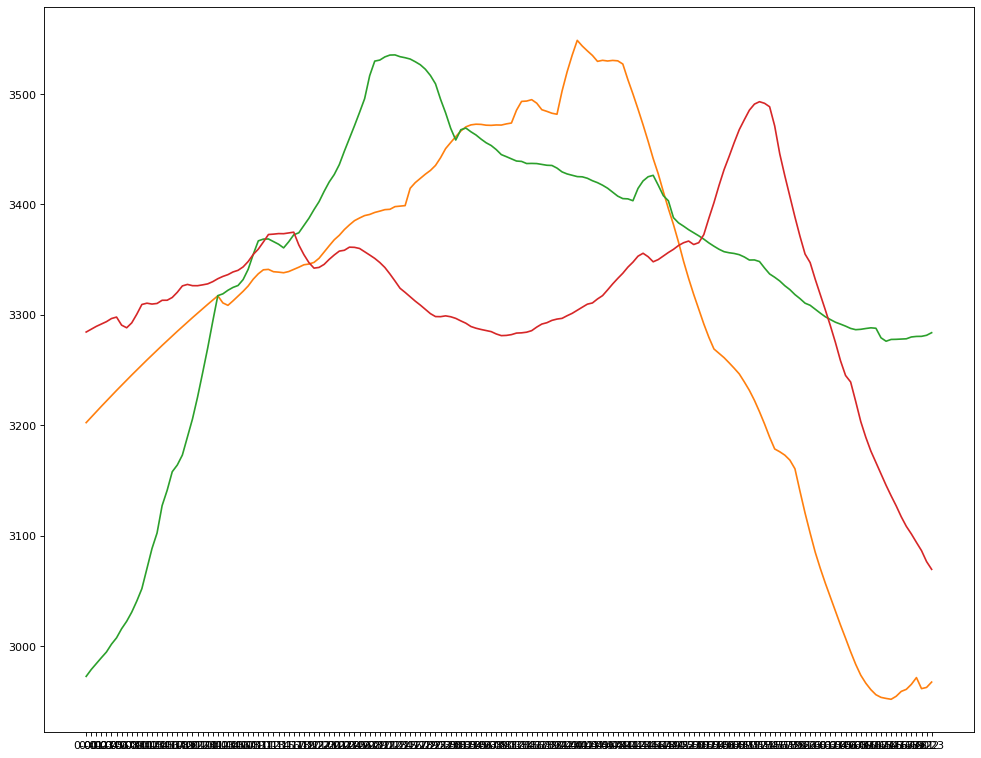

In [289]:
from scipy.signal import savgol_filter
plt.figure(figsize=(15,12), dpi= 80)
dados["energia-s"] = savgol_filter(dados["energia"], 101, 2)
primeiras_tres_semanas = dados.iloc[24:24+24*7*3]
for i, s in enumerate(semanas):
        plt.plot('d-semana hora','energia-s', data=primeiras_tres_semanas.loc[primeiras_tres_semanas.semana==s,:], label=s)
plt.show()

In [296]:
primeiros_tres_meses = dados.loc[:"2000-03"]

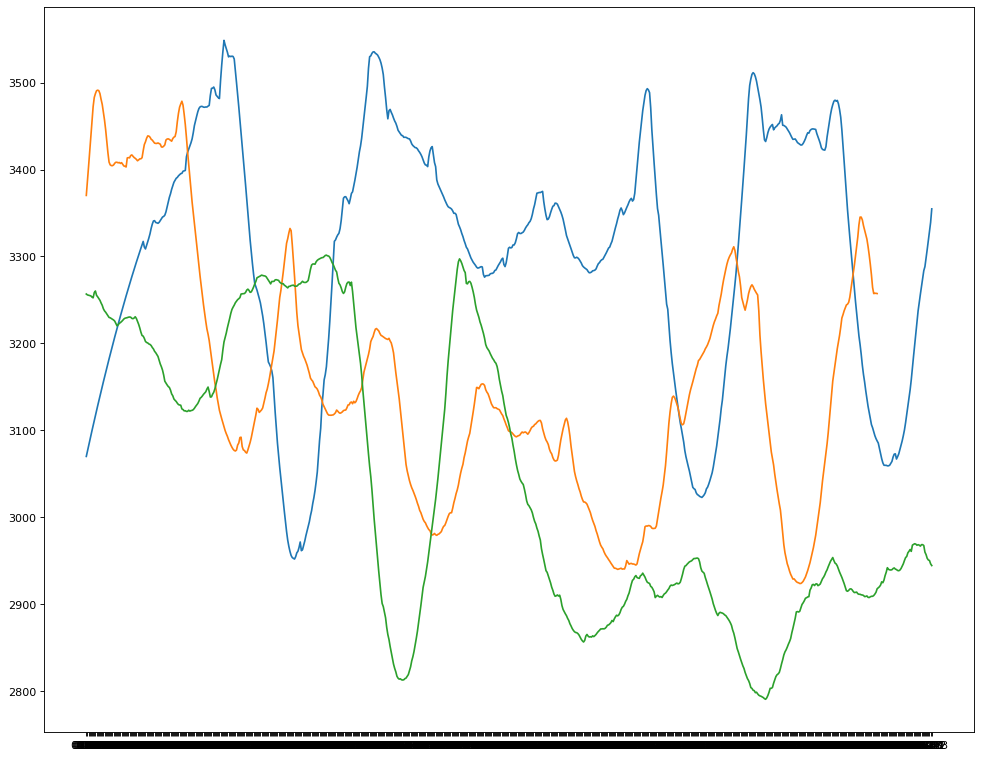

In [297]:
plt.figure(figsize=(15,12), dpi= 80)
for i, m in enumerate(meses):
        plt.plot('dia hora','energia-s', data=primeiros_tres_meses.loc[primeiros_tres_meses.mes==m,:], label=m)
plt.show()

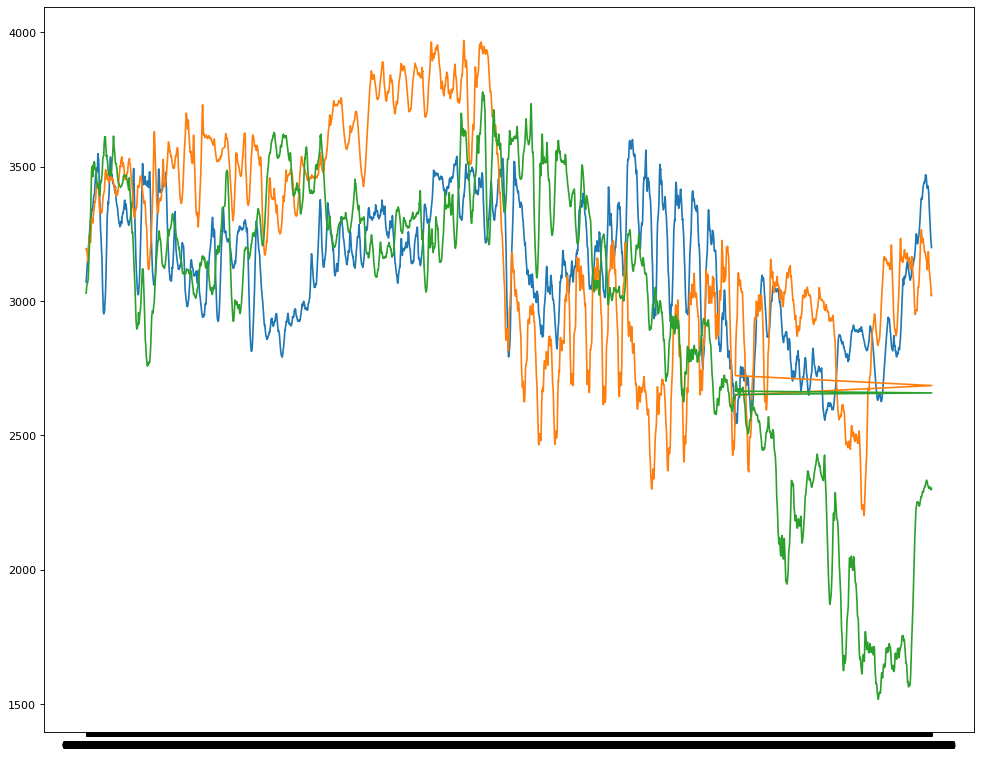

In [298]:
primeiros_tres_anos = dados.loc[:"2002"]
plt.figure(figsize=(15,12), dpi= 80)
for i, a in enumerate(anos):
        plt.plot('mes dia hora','energia-s', data=primeiros_tres_anos.loc[primeiros_tres_anos.ano==a,:], label=a)
plt.show()

In [303]:
dados.tail()

,energia,ano,d-semana,mes,dia,hora,semana,d-semana hora,dia hora,mes dia hora,energia-s
data,,,,,,,,,,,
2021-01-30 20:00:00,NaN,2021,6,01,30,20,04,6-20,30-20,01-30-20,NaN
2021-01-30 21:00:00,NaN,2021,6,01,30,21,04,6-21,30-21,01-30-21,NaN
2021-01-30 22:00:00,NaN,2021,6,01,30,22,04,6-22,30-22,01-30-22,NaN
2021-01-30 23:00:00,NaN,2021,6,01,30,23,04,6-23,30-23,01-30-23,NaN
2021-01-31 00:00:00,NaN,2021,0,01,31,00,05,0-00,31-00,01-31-00,NaN
